# Logistic Regression

In [2]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

In [68]:
# the dataset is loaded from the data file into the variables X
# and y:

data = genfromtxt('./data/ex2data1.txt', delimiter=',')

X = data[:, [0,1]]
y = data[: , 2]

m,n = X.shape

In [69]:
m,n

(100, 2)

In [10]:
X[:10], y[:10]

(array([[34.62365962, 78.02469282],
        [30.28671077, 43.89499752],
        [35.84740877, 72.90219803],
        [60.18259939, 86.3085521 ],
        [79.03273605, 75.34437644],
        [45.08327748, 56.31637178],
        [61.10666454, 96.51142588],
        [75.02474557, 46.55401354],
        [76.0987867 , 87.42056972],
        [84.43281996, 43.53339331]]),
 array([0., 0., 0., 1., 1., 0., 1., 1., 1., 1.]))

Text(0, 0.5, 'Exam 2 Score')

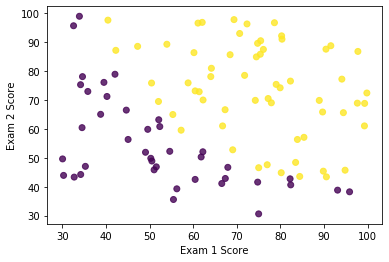

In [70]:
plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = y, alpha = 0.8)

plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')

In [71]:
# sigmoid function

def sigmoid(z):
    return 1/(1 + np.exp(-1*z))

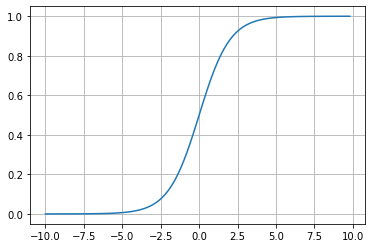

In [87]:
plt.plot(np.arange(-10, 10, 0.2), sigmoid(np.arange(-10, 10, 0.2)))
plt.grid(True)

**Cost Function**

![Cost Function of Logistic Regression](./images/logistic_regression-cost_function.png)

**Gradient**

![Gradient](./images/logistic_regression-gradient.png)

In [72]:
# we add another dimension to our data to accommodate the θ0 intercept term. 
# We also initialize the initial parameters to 0 and the
# learning rate alpha to 0.01.

X = np.column_stack((np.ones(m), X))

X[:5]

array([[ 1.        , 34.62365962, 78.02469282],
       [ 1.        , 30.28671077, 43.89499752],
       [ 1.        , 35.84740877, 72.90219803],
       [ 1.        , 60.18259939, 86.3085521 ],
       [ 1.        , 79.03273605, 75.34437644]])

In [213]:
def computeCost(X, y, theta):
    m,n = X.shape
    
    theta = np.array(theta).reshape(n,1)
    
    y = y.reshape(m,1)
    
    h = sigmoid(X.dot(theta))
        
#     J = (1/m)*((-y.T.dot(np.log(h))).item() - ((1-y).T.dot(np.log(1-h))).item())
    J = (1/m)*(-y.T.dot(np.log(h))[0] - (1-y).T.dot(np.log(1-h))[0])
    
    grad = (1/m)*(X.T.dot(h-y))
    
    return J[0], grad

In [189]:
m,n = X.shape

theta = np.array([0, 0, 0]).reshape(n,1)

y = y.reshape(m,1)

h = sigmoid(X.dot(theta))

J = (1/m)*((-y.T.dot(np.log(h))).item() - ((1-y).T.dot(np.log(1-h))).item())

print(J)

grad = (1/m)*(X.T.dot(h-y))

0.6931471805599452


In [214]:
J, grad = computeCost(X, y, [0, 0, 0])

J, grad

(0.6931471805599452,
 array([[ -0.1       ],
        [-12.00921659],
        [-11.26284221]]))

In [215]:
J, grad = computeCost(X, y, [-24, 0.2, 0.2])

J, grad

(0.2183301938265977,
 array([[0.04290299],
        [2.56623412],
        [2.64679737]]))

**Using Gardient Descent to train**

In [220]:
def gradientDescent(X, y, theta, alpha=0.01, iterations = 1500):
    m,n = X.shape
    
    J_history = []
    
    y = y.reshape(m,1)
        
    theta = np.array(theta).reshape(n,1)
    
    for iter in range(0, iterations):
        
        h = sigmoid(X.dot(theta))

        cost = h - y
        
        theta = theta - alpha * X.T.dot(cost)

#         J_history.append(computeCost(X, y, theta))

    return theta, J_history

In [221]:
t, J_h = gradientDescent(X, y, [0, 0, 0], 0.01, 400)

t

/home/yonas/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/home/yonas/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


array([[-30.59514708],
       [ 36.06051917],
       [-12.5923932 ]])

## Regularized logistic regression